**Jupyter: w_ipa**

This is an example jupyter/ipython notebook for WESTPA simulations, designed for interactive analysis using w_ipa.  Use this as a template for further browser-based interactive analysis of simulations.

You'll want to start each notebook session with the following:

```
    import w_ipython
    w = w_ipython.WIPI()
    w.main()
```

The w object can then be used for analysis.  Schemes can be listed and changed with

```
    w.list_schemes
    w.scheme = SCHEME_NUMBER/NAME
```

Run help(w), or w.introduction for more details.

Happy analyzing!

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
np.set_printoptions(threshold=np.inf)
import w_ipa
w = w_ipa.WIPI()
# At startup, it will load or run the analysis schemes specified in the configuration file (typically west.cfg)
w.main()
w.interface = 'matplotlib'


Welcome to w_ipa (WESTPA Interactive Python Analysis) v. 1.0B!
Run w.introduction for a more thorough introduction, or w.help to see a list of options.
Running analysis & loading files.

Complete!
Setting iteration to iter 100.


In [3]:
total_iteration = w.niters

it = [0.0 for i in range(total_iteration)]

flux = 0.0
flux_array = []
sink = 2.7

lifetime = 0.0
force_eval = 0.0

count_forward = 0
count_backward = 0
for i in range(total_iteration):
    w.iteration = i+1
    l = w.current.pcoord
    wts = w.current.weights
    tau = 11
    force_eval += (tau-1)*w.current.walkers*0.01
    print 'total simulation time = ', force_eval, 'ps'
    for j in range(len(l)):
        #print j
            
        if l[j][0] < sink and l[j][tau-1] >= sink:
            it[i] += wts[j]
            #print wts[j]
            count_forward += 1
            for k in range(tau):
                #print k
                if l[j][k] < sink and l[j][k+1] >= sink:
                    flux += wts[j]
                    lifetime += wts[j]*(i*(tau-1)+k)
                    break
            #break
    print flux
    flux_array.append(flux)
flux = flux/(total_iteration*(tau-1))
    
print "MFPT = ", 1./flux     
print "lifetime = ", lifetime/sum(it)
print sum(it)
print sum(it)/flux

f1 = open('milestone-data.dat','w')
print >>f1, "#MFPT  #MFPT_back  #lifetime  #forward probability  #backward probability #forward count #backward count"
print >>f1, 1./flux, 0.0, lifetime, 1.0, 0.0, count_forward, count_backward
f1.close()

Setting iteration to iter 1.
total simulation time =  0.5 ps
1.0
Setting iteration to iter 2.
total simulation time =  1.0 ps
1.0
Setting iteration to iter 3.
total simulation time =  1.5 ps
1.0
Setting iteration to iter 4.
total simulation time =  2.0 ps
1.0
Setting iteration to iter 5.
total simulation time =  2.5 ps
1.0
Setting iteration to iter 6.
total simulation time =  3.0 ps
1.0
Setting iteration to iter 7.
total simulation time =  3.5 ps
1.0
Setting iteration to iter 8.
total simulation time =  4.0 ps
1.0
Setting iteration to iter 9.
total simulation time =  4.5 ps
1.0
Setting iteration to iter 10.
total simulation time =  5.0 ps
1.0
Setting iteration to iter 11.
total simulation time =  5.5 ps
1.0
Setting iteration to iter 12.
total simulation time =  6.0 ps
1.0
Setting iteration to iter 13.
total simulation time =  6.5 ps
1.0
Setting iteration to iter 14.
total simulation time =  7.0 ps
1.0
Setting iteration to iter 15.
total simulation time =  7.5 ps
1.0
Setting iteration t

In [4]:
print it
f1 = open('FPTD.dat','w')

for i in range(len(it)):
    print >>f1, i*(tau-1), it[i]
    
f1.close()

[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


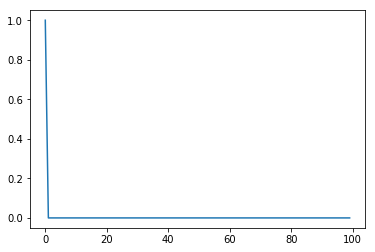

In [5]:
plt.plot(it)

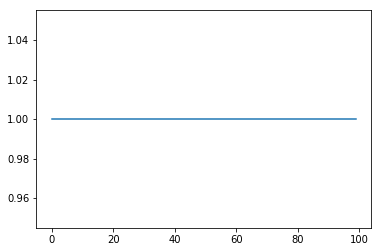

In [6]:
plt.plot(flux_array)
f1 = open('flux.dat','w')
print >>f1, '#time #flux'

for i in range(len(it)):
    print >>f1, i*(tau-1), flux_array[i]
    
f1.close()